### How well do jobs and certain skills pay for Data Analysts? 
#### Methodology
1) Determine Median salary for top 6 data jobs
2) Find median salary per skill for data analysts 
3) Visualize for highest paying skills and most demanding skills 

In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
#Filtering dataframe for jobs in the United States that have a posted salary
df_us = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [8]:
#creating a list of the top 6 most common job titles 
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [10]:
#filtering dataframe to include only jobs that are in my job_titles list 

df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [17]:
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()
job_order

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Data Analyst']

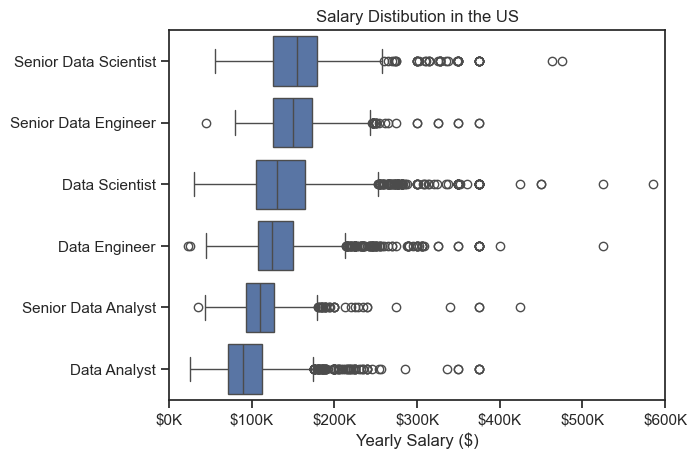

In [18]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distibution in the US')
plt.xlabel('Yearly Salary ($)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

### Investigate Median Salary vs Skills for Data Analyst 

In [ ]:
#Filtering for data analyst jobs in the United States and creating a copy of the data

df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])


In [21]:
df_da_us = df_da_us.explode('job_skills')

In [ ]:
#Creating a dataframe of skills associated with the highest median pay 
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)
df_da_top_pay = df_da_top_pay.head(10)

In [32]:
#Creating a dataframe of the most common skills sorted by highest median pay
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.head(10)
df_da_skills = df_da_skills.sort_values(by='median', ascending=False)

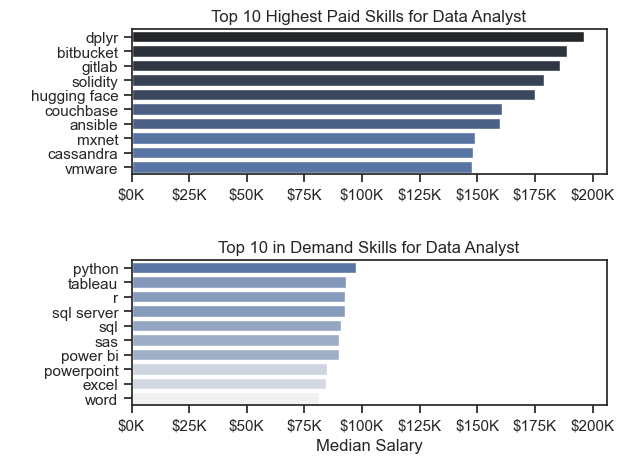

In [33]:
#Creating a subplot
fig, ax =plt.subplots(2,1)


sns.set_theme(style='ticks')

#df_da_top_pay[::-1].plot(kind='barh', y ='median', ax=ax[0], legend=False)

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_da_skills[::-1].plot(kind='barh', y ='median', ax=ax[1], legend=False)

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)

ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


#changing the xlim for both figures by set_xlim on the bottom plot to match the current xlim of top plot
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()